In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pymc3.gp.util import plot_gp_dist
#import matplotlib.cm as cmap

import numpy as np
import scipy as sp
import pandas as pd
import geopandas as gpd
np.random.seed(42)

import theano
import theano.tensor as tt
import pymc3 as pm

import pickle

import time

pm.__version__

from scipy import stats
from scipy.special import expit as logistic

import arviz as az

import math

/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)


In [2]:
# Tror mpske kun jeg skal bruge point...

pkl_file = open('full_df.pkl', 'rb')

df = pickle.load(pkl_file)

pkl_file.close()

In [3]:
# y_north_limit = df[(df['year']==2017) & (df['best'] > 0)]['ycoord'].max()
# y_south_limit = df[(df['year']==2017) & (df['best'] > 0)]['ycoord'].min()

# x_west_limit  = df[(df['year']==2017) & (df['best'] > 0)]['xcoord'].min()
# x_east_limit  = df[(df['year']==2017) & (df['best'] > 0)]['xcoord'].max()

# subset for estimation of hyper params ls and eta.

x_west_limit = 30
x_east_limit = 75

y_north_limit = 38 
y_south_limit = 12

df_sub = df[(df['year']==2017)&(df['ycoord'] > y_south_limit)&(df['ycoord'] < y_north_limit)&(df['xcoord']<x_east_limit)&(df['xcoord']>x_west_limit)]

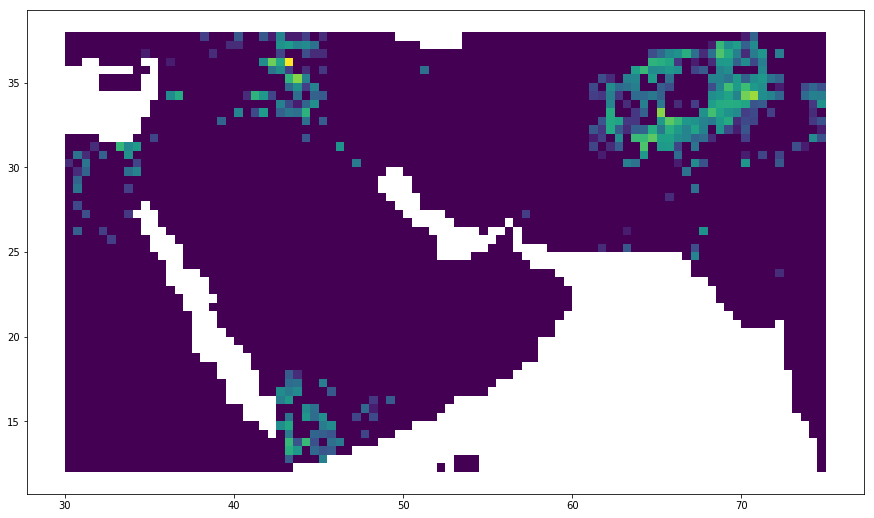

In [4]:
df_sub.plot(column = 'log_best', figsize=(15, 15))
plt.show()

In [5]:
X = np.array([df_sub['xcoord'], df_sub['ycoord']]).T

y = np.array(df_sub['log_best'])

In [6]:
time0 = time.time()

with pm.Model() as model:
    
    # priors
    ℓ = pm.Gamma("ℓ", alpha=2, beta=2, shape = 1)
    η = pm.HalfCauchy("η", beta=5, shape = 1)

    # noise model
    σ = pm.HalfCauchy("σ", beta=2, shape = 1)
        
    cov = η **2 * pm.gp.cov.ExpQuad(2, ℓ)
        
    gp = pm.gp.Marginal(cov_func=cov)
        
    y_ = gp.marginal_likelihood("y_", X=X, y=y, noise= σ)
        

/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [7]:
time1 = time.time()

with model:
    mp = pm.find_MAP()

/home/polichinel/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `ar

In [8]:
time2 = time.time()
step0t = (time1 - time0)/60
step1t = (time2 - time1)/60

stepallt = (time2 - time0)/60

print('step 0: {}min \n step 1: {} \n time total: {}min'.format(step0t, step1t, stepallt))

step 0: 0.9628708720207214min 
 step 1: 10.70375072558721 
 time total: 11.66662159760793min


In [9]:
mp

{'η': array([0.74898533]),
 'η_log__': array([-0.28903589]),
 'σ': array([0.72533913]),
 'σ_log__': array([-0.32111597]),
 'ℓ': array([1.16623133]),
 'ℓ_log__': array([0.15377746])}

# new/more data

In [10]:
# df_full = df[df['year']==2017]
# Xf = np.array([df_full['xcoord'], df_full['ycoord']]).T

# yf = np.array(df_full['log_best'])

# -----------------------------------------------------------

# y_north_limit = df[(df['year']==2017) & (df['best'] > 0)]['ycoord'].max()
# y_south_limit = df[(df['year']==2017) & (df['best'] > 0)]['ycoord'].min()

# x_west_limit  = df[(df['year']==2017) & (df['best'] > 0)]['xcoord'].min()
# x_east_limit  = df[(df['year']==2017) & (df['best'] > 0)]['xcoord'].max()

# subset for estimation of hyper params ls and eta.

x_west_limit = -45
x_east_limit = 75 # 30

y_north_limit = 38 
y_south_limit = 0

df_full = df[(df['year']==2017)&(df['ycoord'] > y_south_limit)&(df['ycoord'] < y_north_limit)&(df['xcoord']<x_east_limit)&(df['xcoord']>x_west_limit)]
Xf = np.array([df_full['xcoord'], df_full['ycoord']]).T

yf = np.array(df_full['log_best'])

In [11]:
#WORKING!
# mu, var = gp.predict(Xf, point=mp, given = {'gp' : gp, 'X' : Xf, 'y' : yf, 'noise' : σ }, diag=True)

In [12]:
mu, var = gp.predict(Xf, point=mp, given = {'X' : Xf, 'y' : yf, 'noise' : σ }, diag=True)

/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/polichinel/anaconda3/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future 

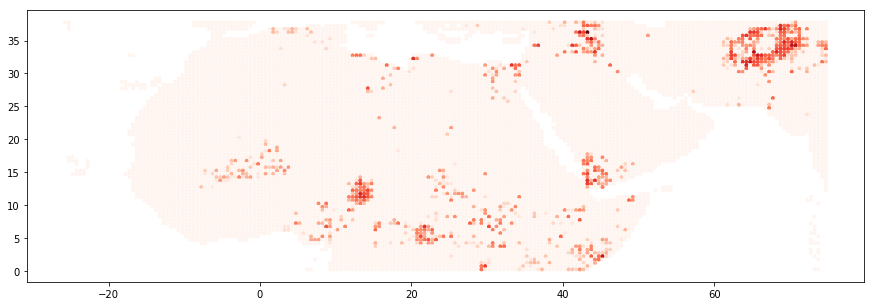

In [13]:
plt.figure(figsize=[15,5])

plt.scatter(Xf[:,0], Xf[:,1], s=35, c=yf, marker='.', cmap='Reds')
plt.show()


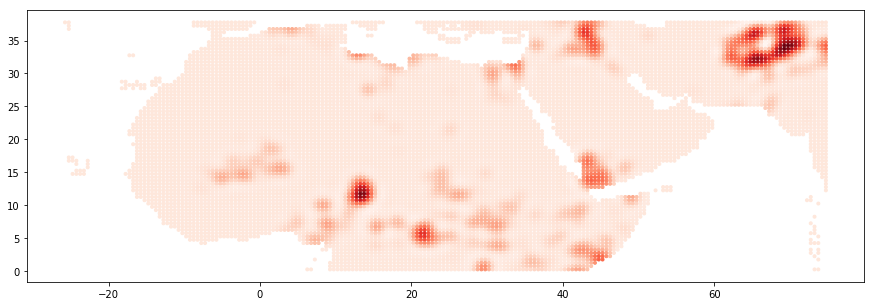

In [14]:
plt.figure(figsize=[15,5])
plt.scatter(Xf[:,0], Xf[:,1], s=35, c=mu, marker='.', cmap='Reds')
plt.show()

In [15]:
file_name = "map.pkl"
output = open(file_name, 'wb') # still not working right!!
pickle.dump(mp, output)
output.close()